In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(100)

class Layer:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error = None
        self.delta = None

    def activate(self, x):
        r = np.dot(x, self.weights) + self.bias
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):

        # tanh
        if self.activation == 'tanh':
            return np.tanh(r)

        # sigmoid
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))

        if self.activation == 'relu':
            return np.maximum(0, r)

        return r

    def apply_activation_derivative(self, r):

        if self.activation is None:
            return r

        if self.activation == 'tanh':
            return 1 - r ** 2

        if self.activation == 'sigmoid':
            return r * (1 - r)

        if self.activation == 'relu':
            return np.heaviside(r, 1)

        return r


class NeuralNetwork:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)

        # Loop over the layers backward
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]

            # If this is the output layer
            if layer == self._layers[-1]:
                layer.error = y - output
                # The output = layer.last_activation in this case
                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:
                next_layer = self._layers[i + 1]
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)
        phi = []
        # Update the weights
        for i in range(len(self._layers)):
            layer = self._layers[i]
            # The input is either the previous layers output or X itself (for the first hidden layer)
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.delta * input_to_use.T * learning_rate
            phi.append(sum(layer.weights[0]))
        return phi
        


    def train(self, X, y, learning_rate, max_epochs):

        mses = []
        phis = []

        for i in range(max_epochs):
            for j in range(len(X)):
                phi = self.backpropagation(X[j], y[j], learning_rate)
                mse = np.mean(np.square(y - nn.feed_forward(X)))
                mses.append(mse)
                phis.append(phi)
                print('Training MSE %f' % (float(mse)))

        return mses, phis


# preprocesing

In [67]:
df = pd.read_csv("https://raw.githubusercontent.com/omarbecerrasierra/marketing_analysis/main/traindata.csv")
df = df.drop(columns=["Kidhome", "Teenhome", "NumWebVisitsMonth",	"AcceptedCmp3",
                 "AcceptedCmp4",	"AcceptedCmp5",	"AcceptedCmp1",	"AcceptedCmp2",	"Complain",	"Response",
                 "SecondCycle",	"Basic",	"Graduation",	"Master",	"PhD",	"Divorced",	"Married",
                 "Single",	"Together",	"Widow", "AcceptedCmpOverall",
                 "NumDealsPurchases",	"NumWebPurchases",	"NumCatalogPurchases",	"NumStorePurchases", "Recency"])

def normalization(df):
    return (df - df.min()) / (df.max() - df.min())

X = normalization(df)
X

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Customer_Days,MntTotal,MntRegularProds
0,0.503625,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.696429,0.948498,0.613189,0.628968
1,0.398325,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.750000,0.161660,0.006836,0.108719
2,0.623933,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.553571,0.446352,0.293526,0.355710
3,0.222456,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.214286,0.198856,0.017692,0.118935
4,0.505009,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.267857,0.230329,0.162043,0.246260
...,...,...,...,...,...,...,...,...,...,...,...
2235,0.531169,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,0.517857,0.545064,0.438279,0.412258
2236,0.556087,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,0.892857,0.027182,0.173703,0.259394
2237,0.493295,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,0.267857,0.221745,0.487736,0.538490
2238,0.602791,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,0.714286,0.223176,0.312827,0.366290


# split data

In [68]:
def split_data(df, val = True):
    train = df.sample(frac=0.8)
    test = df.drop(train.index)
    if val == True:
        validation = train.sample(frac = 0.25) # 100*20/80 = 20%
        train = train.drop(validation.index) 
        return train, test, validation
    return train, test
train, test, validation = split_data(X)

# Traning data

In [69]:
train

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Customer_Days,MntTotal,MntRegularProds
207,0.419548,0.054253,0.090452,0.065507,0.181467,0.049430,0.058011,0.589286,0.589413,0.107760,0.194819
1813,0.548882,0.293369,0.849246,0.327536,0.351351,0.642586,0.193370,0.071429,0.751073,0.574186,0.600146
441,0.486527,0.051574,0.140704,0.017971,0.061776,0.000000,0.011050,0.857143,0.273247,0.059509,0.157242
1676,0.230733,0.033490,0.075377,0.063768,0.150579,0.057034,0.041436,0.375000,0.659514,0.090470,0.181321
1421,0.571176,0.186872,0.864322,0.042899,0.146718,0.030418,0.679558,0.428571,0.370529,0.227986,0.221817
...,...,...,...,...,...,...,...,...,...,...,...
1585,0.304721,0.010047,0.000000,0.004638,0.015444,0.007605,0.055249,0.410714,0.058655,0.010052,0.106530
717,0.215358,0.006028,0.020101,0.010435,0.027027,0.019011,0.013812,0.321429,0.719599,0.015682,0.117111
2026,0.249473,0.006028,0.005025,0.001739,0.000000,0.015209,0.022099,0.553571,0.678112,0.005227,0.106530
771,0.689341,0.531815,0.577889,0.140870,0.579151,0.000000,0.566298,0.803571,0.284692,0.521914,0.503466


# Arquitectura Grande

Training MSE 0.103657
Training MSE 0.412662
Training MSE 0.148416
Training MSE 0.113227
Training MSE 0.168135
Training MSE 0.098144
Training MSE 0.086618
Training MSE 0.107278
Training MSE 0.101640
Training MSE 0.104979
Training MSE 0.331950
Training MSE 0.085841
Training MSE 0.090512
Training MSE 0.104924
Training MSE 0.066848
Training MSE 0.194582
Training MSE 0.142047
Training MSE 0.063893
Training MSE 0.403272
Training MSE 0.141313
Training MSE 0.114068
Training MSE 0.196911
Training MSE 0.092901
Training MSE 0.199354
Training MSE 0.116962
Training MSE 0.099849
Training MSE 0.141413
Training MSE 0.064784
Training MSE 0.058660
Training MSE 0.158474
Training MSE 0.105869
Training MSE 0.102132
Training MSE 0.176162
Training MSE 0.075722
Training MSE 0.077916
Training MSE 0.103871
Training MSE 0.090613
Training MSE 0.073404
Training MSE 0.072023
Training MSE 0.232332
Training MSE 0.142294
Training MSE 0.239473
Training MSE 0.084683
Training MSE 0.109427
Training MSE 0.217016
Training M

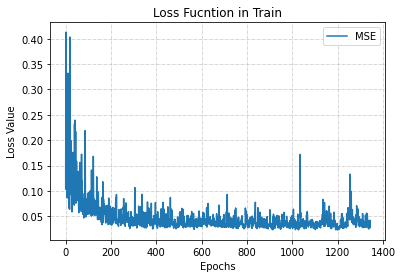

In [80]:
nn = NeuralNetwork()
nn.add_layer(Layer(11, 9, 'tanh'))
nn.add_layer(Layer(9, 5, 'sigmoid'))
nn.add_layer(Layer(5, 2, 'relu'))
nn.add_layer(Layer(2, 6, 'sigmoid'))
nn.add_layer(Layer(6, 11, 'relu'))
X_tr = train.to_numpy()
# Train the neural network
errors, phis = nn.train(X_tr, X_tr, 1, 1)
prediction_tr = nn.predict(X_tr)

# Plot changes in mse
plt.plot(errors, label = 'MSE')
plt.title('Loss Fucntion in Train')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.grid(linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()

# Plot learning rate of the Perceptron

para este caso se eligio la arquitectura grande por los resultados en convergencia 

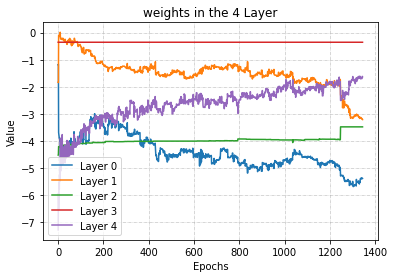

In [81]:
arrayphis = np.array(phis)
for i in range(len(arrayphis[0])):
    plt.plot(arrayphis[:, i], label = 'Layer {}'.format(i))
plt.title('weights in the 4 Layer')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.grid(linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()